# XGBoost


## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.23ubuntu1 is an invalid version and will not be supported in a future release

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.1.36ubuntu1 is an invalid version and will not be supported in a future release



In [3]:
print('pandas', pd.__version__)
print('xgboost', xgboost.__version__)

pandas 1.4.1
xgboost 1.5.2


## Data

In [4]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-05-10 09:11:40--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.224.141.128, 13.224.141.110, 13.224.141.106, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.224.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121533 (119K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 118.68K  --.-KB/s    in 0.04s   

2022-05-10 09:11:40 (3.16 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [121533/121533]



In [5]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(844, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-04,26421,2090,246,221,326,173,137,319,498,207,...,103,150,1557,175,361,314,247,372,469,1201
2022-05-05,20713,1854,290,197,210,170,125,339,481,233,...,130,157,1372,244,229,255,230,225,420,1327
2022-05-06,21547,1668,153,181,230,181,115,324,340,262,...,135,140,1181,294,203,290,258,287,521,1398
2022-05-07,39239,2112,356,270,538,329,201,499,348,638,...,353,291,2209,495,578,736,466,464,928,2375
2022-05-08,42415,3115,362,362,570,269,258,599,429,492,...,254,209,2375,230,585,536,414,624,733,2060


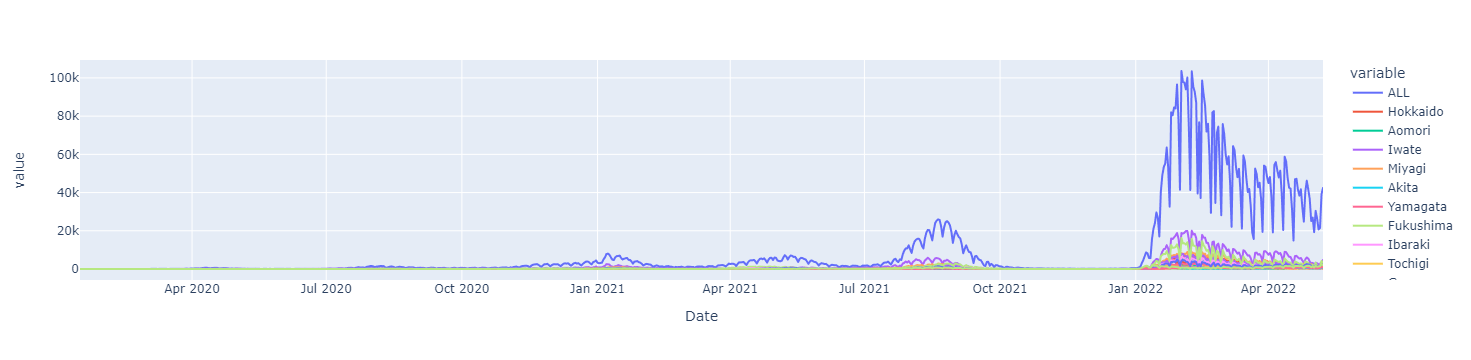

In [6]:
px.line(df, )

In [7]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(120, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-03,43792.142857,1608.142857,395.000000,212.000000,573.285714,259.571429,110.714286,427.142857,1303.857143,538.428571,...,243.428571,129.571429,1616.571429,325.000000,205.142857,462.428571,354.285714,336.714286,626.285714,987.428571
2022-04-10,45726.000000,1906.428571,416.142857,343.571429,590.000000,292.571429,86.571429,525.000000,1250.285714,599.142857,...,271.714286,138.428571,1832.428571,353.857143,257.571429,578.857143,393.428571,505.428571,598.142857,1213.428571
2022-04-17,42720.142857,2151.285714,350.714286,319.857143,534.000000,300.571429,130.000000,537.571429,989.571429,523.428571,...,289.714286,139.857143,1794.857143,434.428571,285.857143,547.857143,376.571429,574.857143,577.285714,1346.714286
2022-04-24,37567.571429,2401.857143,338.142857,337.571429,558.571429,258.142857,107.285714,524.285714,821.285714,591.714286,...,261.571429,138.428571,1661.000000,423.857143,324.857143,366.000000,360.285714,461.571429,653.285714,1395.285714
2022-05-01,34534.285714,2514.285714,346.857143,271.142857,422.428571,252.142857,162.714286,396.857143,685.428571,495.714286,...,256.714286,151.285714,2027.571429,362.000000,484.428571,511.571429,378.428571,383.857143,667.571429,1316.428571


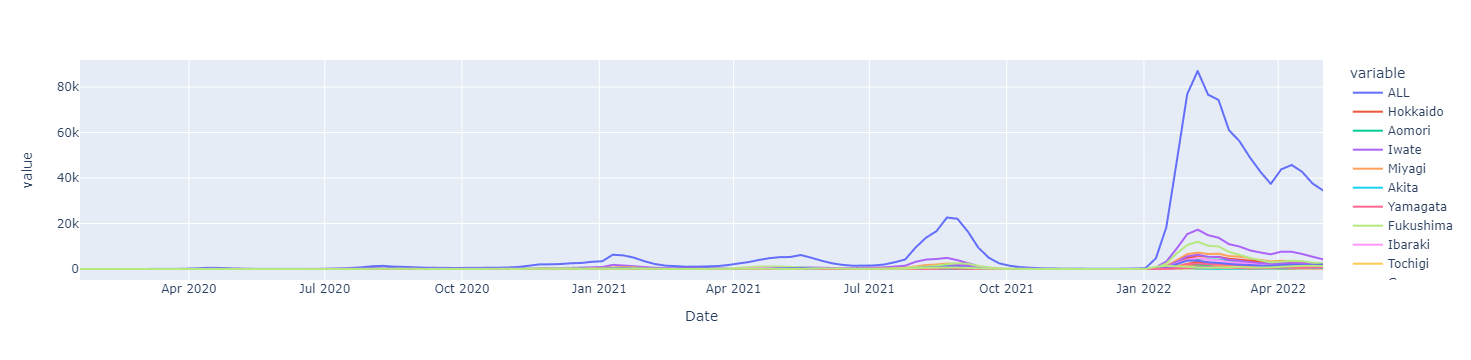

In [8]:
px.line(df_gr,)

### Scale

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
ts_all = df_gr.ALL
ts_all_sc = sc.fit_transform(ts_all.values.reshape(-1, 1)).ravel()
ts_all_sc = pd.Series(ts_all_sc, index=ts_all.index)
ts_all_sc.head(1)

Date
2020-01-19    0.0
Freq: W-SUN, dtype: float64

### FE

In [10]:
forecast_weeks = 12
# df_fe = df_gr.ALL.to_frame()
df_fe = ts_all_sc.to_frame(name='ALL')

# add new rows for forecast
index_list = pd.date_range(ts_all_sc.index[-1]+relativedelta(weeks=1), ts_all_sc.index[-1]+relativedelta(weeks=forecast_weeks), freq='W')
df_fe = pd.concat([df_fe, pd.DataFrame(index=index_list)])

# shift
for i in range(forecast_weeks, forecast_weeks+12):
    df_fe[f'ALL_{i}_week_ago'] = df_fe.ALL.shift(i)
# df_fe[f'ALL_12_week_ago'] = df_fe.ALL.shift(12)
df_fe['year'] = df_fe.index.year
df_fe['month'] = df_fe.index.month
df_fe['weekofyear'] = df_fe.index.isocalendar().week
df_fe = df_fe.astype('float')
df_fe = df_fe.loc[df_fe.ALL_23_week_ago.dropna().index, :]
df_fe

,ALL,ALL_12_week_ago,ALL_13_week_ago,ALL_14_week_ago,ALL_15_week_ago,ALL_16_week_ago,ALL_17_week_ago,ALL_18_week_ago,ALL_19_week_ago,ALL_20_week_ago,ALL_21_week_ago,ALL_22_week_ago,ALL_23_week_ago,year,month,weekofyear
2020-06-28,0.000915,0.003131,0.001283,0.000442,0.000521,0.000385,0.000181,0.000124,0.000022,0.000002,0.000010,0.000002,0.000000,2020.0,6.0,26.0
2020-07-05,0.002087,0.005708,0.003131,0.001283,0.000442,0.000521,0.000385,0.000181,0.000124,0.000022,0.000002,0.000010,0.000002,2020.0,7.0,27.0
2020-07-12,0.003468,0.005692,0.005708,0.003131,0.001283,0.000442,0.000521,0.000385,0.000181,0.000124,0.000022,0.000002,0.000010,2020.0,7.0,28.0
2020-07-19,0.005533,0.004362,0.005692,0.005708,0.003131,0.001283,0.000442,0.000521,0.000385,0.000181,0.000124,0.000022,0.000002,2020.0,7.0,29.0
2020-07-26,0.008496,0.002698,0.004362,0.005692,0.005708,0.003131,0.001283,0.000442,0.000521,0.000385,0.000181,0.000124,0.000022,2020.0,7.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,NaN,0.503228,0.429759,0.491722,0.563668,0.645621,0.700919,0.853528,0.880569,1.000000,0.882926,0.543923,0.210727,2022.0,6.0,25.0
2022-07-03,NaN,0.525451,0.503228,0.429759,0.491722,0.563668,0.645621,0.700919,0.853528,0.880569,1.000000,0.882926,0.543923,2022.0,7.0,26.0
2022-07-10,NaN,0.490910,0.525451,0.503228,0.429759,0.491722,0.563668,0.645621,0.700919,0.853528,0.880569,1.000000,0.882926,2022.0,7.0,27.0
2022-07-17,NaN,0.431700,0.490910,0.525451,0.503228,0.429759,0.491722,0.563668,0.645621,0.700919,0.853528,0.880569,1.000000,2022.0,7.0,28.0


### split

In [11]:
X = df_fe.drop('ALL', axis=1)
y = df_fe.ALL
print(X.shape, y.shape)

(109, 15) (109,)


## functions

In [12]:
def trainXGBoost(X_train, y_train):    
    # val
    X_val = X_train[X_train.index == X_train.index[-1]]
    X_train = X_train.drop(X_train.index[-1])
    y_val = y_train[y_train.index == y_train.index[-1]]
    y_train = y_train.drop(y_train.index[-1])
    
    params = {'n_estimators': 1000, 'random_state': 42, 'objective': 'reg:squarederror', 'booster': 'gblinear'}
    
    model = xgboost.XGBRegressor(**params)
    model.fit(
        X_train, y_train, verbose=0,
        eval_set=[(X_val, y_val)], eval_metric='rmse', early_stopping_rounds=10,
    )

    return model

## forecast

In [13]:
df_gr.index[-2]

Timestamp('2022-04-24 00:00:00', freq='W-SUN')

(97, 15) (97,)


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



CPU times: user 1.05 s, sys: 34.7 ms, total: 1.08 s
Wall time: 233 ms


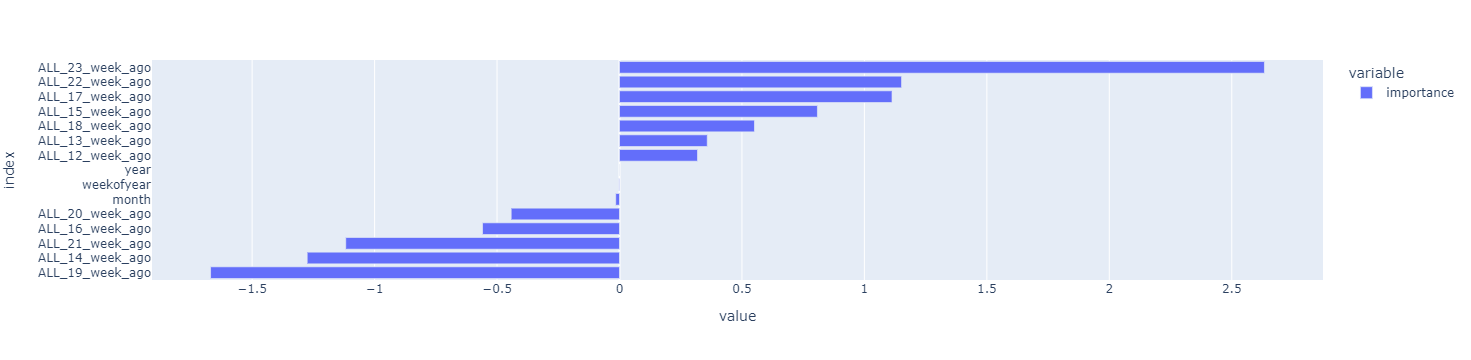

In [14]:
%%time

train_last_date = df_gr.index[-1]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
print(X_train.shape, y_train.shape)

model = trainXGBoost(X_train, y_train)

fi = pd.DataFrame(model.coef_, index=X_train.columns, columns=['importance']).sort_values('importance')
px.bar(fi, orientation='h')

RMSE: 1.2646e+04


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



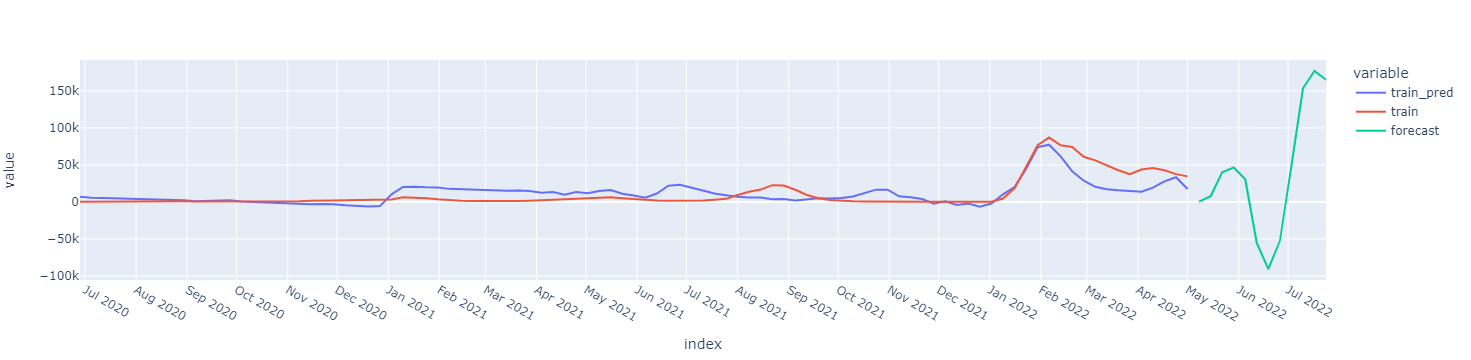

In [15]:
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
y_train_index = y_train.index

y_train_pred = model.predict(X_train)
y_train_pred = sc.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_pred = pd.Series(y_train_pred, index=y_train_index, name='train_pred')
y_train = sc.inverse_transform(y_train.values.reshape(-1, 1)).ravel()
y_train = pd.Series(y_train, index=y_train_index, name='train')

rmse = np.sqrt( mean_squared_error(y_train, y_train_pred) )
print('RMSE: {:.5}'.format(rmse))

X_forecast = X[X.index > train_last_date]
y_forecast = y[y.index > train_last_date]
y_forecast_index = y_forecast.index

y_forecast = model.predict(X_forecast)
y_forecast = sc.inverse_transform(y_forecast.reshape(-1, 1)).ravel()
y_forecast = pd.Series(y_forecast, index=y_forecast_index, name='forecast')

fig = px.line(pd.concat([y_train_pred, y_train, y_forecast], axis=1))
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()